In [1]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/clone_af_dendrograms'

In [2]:

# INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/barcodes/btwnClones_dendro_dt_0.6/"
# DONOR = 0
# dendroThresh=0.6

#clones_meta = '/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/results/clones_summary/feb23_2022/clones_summary.csv'
#clones_indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/"
#clone_sizes_in_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/clone_counts/minCellConds_1/clone_sizes.csv"
# INDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2//data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro_dt_dynamic"
# DONOR = 0

INDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30"
OUTDIR = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/barcodes/btwnClones_dendro_dt_dynamic_101022"
DONOR = 0

dendroThresh = "dynamic"

# INDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30"
# OUTDIR = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_30/barcodes/btwnClones_dendro_dt_0.6"
# DONOR = 1
#dendroThresh = "dynamic" #0.6

verbose=False

mt_ref="/data/Mito_Trace/data/processed/genomes/mtMasked/GRCh38_MT_blacklist_A2_2020/chrM.fasta"

In [3]:
import src.utils.variant_utils as vu
import src.utils.dendro_clust as dc

import mplh.cluster_help as ch
import mplh.fig_utils as fu

from os.path import join, exists, dirname
from glob import glob
import pickle
import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)
import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})
import scipy
from itertools import combinations
#from src.utils import utils  as ut

fig_utils from mplh
0.5.6


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
out_f = join(OUTDIR, f"donor{DONOR}")

### Load cells_meta 
### Create clones_meta - get number of cells in a clone and donor

In [6]:
cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep="\t")
cells_meta["lineage"] = cells_meta.apply(lambda x: f'{x["donor"]}_{x["lineage"]}', axis=1)
cells_meta

,ID,lineage,donor,condition
0,AAACTGCAGACTTCCA-1_Input,0_0,0,Input
1,AAACTGCTCCAACGCG-1_Input,0_0,0,Input
2,AAAGGATCAGATAAGT-1_Input,0_0,0,Input
3,AAAGGATTCCTGACCT-1_Input,0_0,0,Input
4,AAAGGGCTCGTTACAG-1_Input,0_0,0,Input
...,...,...,...,...
6604,TAGGTGTGTACGTAAA-1_Input,1_25,1,Input
6605,TCCCACAGTTCAGAAA-1_Input,1_25,1,Input
6606,TCTCAGCCAGCAATGG-1_Input,1_25,1,Input
6607,TGGGTGCAGCGCCTAC-1_Input,1_25,1,Input


In [7]:
conditions = cells_meta["condition"].unique()

In [8]:
clones_meta_df = pd.DataFrame(cells_meta.groupby("lineage").size(), columns=["size"]) #, index=["size"])
clones_meta_df["donor"] = [x.split("_")[0] for x in clones_meta_df.index]
clones_meta_df["donor"] = clones_meta_df["donor"].astype(int)
clones_meta_df

,size,donor
lineage,,
0_0,447,0
0_1,279,0
0_10,106,0
0_11,105,0
0_12,104,0
...,...,...
1_5,165,1
1_6,159,1
1_7,142,1


In [9]:
curr_clones = clones_meta_df[clones_meta_df["donor"]==DONOR]
# cells_meta = pd.read_csv(join(INDIR, "cells_meta.tsv"), sep='\t')#.sort_values(["donor", "lineage"])
curr_labels = cells_meta[cells_meta["donor"]==DONOR]

In [10]:
# curr_clones = clones_meta_df[clones_meta_df["donor"]==DONOR].set_index("lineage")
# curr_clones

## Load AF and DP

In [11]:
af_indir = join(INDIR, "sc_af", f"donor{DONOR}")
AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


### Functions to get mean and median

In [12]:
def calc_mean(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].mean(axis=1)

def calc_median(cells, af):
    #print(cells.head())
    return af.loc[:,cells["ID"].values].median(axis=1)

def calc_mean_with_coverage(cells, af, cov, min_cov=30):
    keep_inds = cov.loc[:, cells["ID"].values]
    keep_inds = keep_inds[keep_inds >= min_cov].columns
    #print('# dropped inds', len(cells["ID"].values)-len(keep_inds))
    return af.loc[:,keep_inds].mean(axis=1)

In [13]:
%matplotlib inline
def cluster_and_plot(df, dp, clones_meta, vmax, to_sqrt, name):
    # Set title and full name prefix
    tit = f"AF Max={vmax}"
    name = f"{name}.{vmax}"
    if to_sqrt:
        name = name + ".sqrt"
        tit = f"{tit} (square root)"
        df = np.sqrt(df)
    df = np.clip(df, 0, vmax)
    
    # Get variant types
    variants_df = vu.add_ref_to_variants(variants=df.columns.values,
                                         mt_df=vu.load_mt_ref(mt_ref))
    variants_df = vu.type_of_variants(variants_df, to_preproc=False)
    
    clones_meta = clones_meta.drop("donor", axis=1, errors="ignore")
    # Dynamic cluster
    if not (df.shape[0] == 1 or  df.shape[1] == 1 ):
        if dendroThresh == "dynamic":
            clusters, link = dc.run_dynamic_hyper(df, metric='cosine', method='complete', deepSplit=3)
            clones_meta.loc[:, "den_clust"] = clones_meta.apply(lambda x: f'C{clusters.loc[x.name, "labels"]}', axis=1)
        else:
            den = dc.dendro_cluster(df, g, d_thresh=dendroThresh)
            clones_meta = dc.add_cluster_labels(den,clones_meta)
        size_pvals = dc.cluster_stats(clones_meta, out_f= name )
        #clones_meta[:, "donor"]= [x.split("_")[0] for x in clones_meta.index]
        clones_meta = clones_meta.loc[df.index]
        
        clones_meta.to_csv(name+".clones_dendro.csv")
    else:
        with open(name+".dendrogram_pvals.txt", "w") as f:
            f.write("no cells")
    
    ## Group clones using dendrogram and run stats on size differences in the groups

    ## Plot with dendro clusters

    if not (df.shape[0] == 1 or  df.shape[1] == 1 ):
        g = ch.plot_cluster(df, row_meta=clones_meta[["size"]], to_row_clust=True, to_col_clust=True,
                            col_meta=variants_df[["variant type"]], col_clr_schemes="categorical",
                            row_clr_schemes={"size":"sequential","den_clust":"categorical"}, 
                            vmax=vmax, vmin=0, cmap="rocket_r",
                            row_linkage=link, yticklabels=1, xticklabels=1)
        plt.suptitle(tit)
        
        fu.helper_save(name+ ".dendro.NoCondition.AF.png",to_pdf=True, to_svg=True)

        inds = g.dendrogram_row.dendrogram["leaves"]
        cols = g.dendrogram_col.dendrogram["leaves"]
        g1d = ch.plot_cluster(dp.iloc[inds, cols], row_meta=clones_meta, to_row_clust=False, to_col_clust=False,
                              row_clr_schemes={"size":"sequential", "den_clust":"categorical"}, 
                              col_meta=variants_df[["variant type", "variant change"]], col_clr_schemes="categorical",
                              cmap="rocket_r", yticklabels=1, xticklabels=1)
        g1d.ax_cbar.set_title("log2(reads+1)")
        fu.helper_save(name+".dendro.NoCondition.DP.png",to_pdf=True, to_svg=True)#, f=g1d.figure)
        
        df = df.iloc[inds,cols]
        clones_meta = clones_meta.loc[df.index]        
        df.to_csv(name + ".af.csv")
    else:
        f = plt.figure()
        plt.title("no cells")
        f.savefig(name+".dendro.NoCondition.AF.png")
    return


### Calculate clone-barcode mean

In [14]:
mean_af = curr_labels.groupby(["lineage"]).apply(calc_mean, af=AF_df)
anno = mean_af.reset_index()[["lineage"]]
mean_dp = curr_labels.groupby(["lineage"]).apply(calc_mean, af=np.log2(DP_df+1))
mean_dp = mean_dp.loc[mean_af.index, mean_af.columns]

# Get mean with no low coverage
mean_nocov_af = curr_labels.groupby(["lineage"]).apply(calc_mean_with_coverage, af=AF_df, cov=DP_df)  

## Remove low valued variants
out_f_rmLow = out_f + ".rmLowVars"
mean_rmLow_af = mean_af.copy().loc[:,~(mean_af<0.01).all(axis=0)]
mean_rmLow_dp = mean_dp.loc[mean_rmLow_af.index, mean_rmLow_af.columns]


#anno_dp = mean_dp.reset_index()[["lineage"]]
# na_cells = curr_labels.loc[curr_labels["lineage"].isnull()]
# na_mean_af = na_cells.groupby("condition").apply(calc_mean, af=AF_df)

# if not (na_mean_af.shape[0] == 0):
#     print('na shape', na_mean_af.shape)
#     na_anno = pd.concat((anno,pd.DataFrame({"lineage":["None"]*len(na_mean_af.index)})), ignore_index=True)
#     na_concat = pd.concat((mean_af.reset_index(drop=True), na_mean_af.reset_index(drop=True)), ignore_index=True)
#     na_mean_dp = na_cells.groupby("condition").apply(calc_mean, af=np.log2(DP_df+1))
#     na_dp_concat = pd.concat((mean_dp, na_mean_dp.reset_index(drop=True)), ignore_index=True)
# else:
#     na_anno = anno
#     na_concat = mean_af.reset_index(drop=True)
#     na_dp_concat = mean_dp
     


distances
[0.29456 0.00341 0.29907 0.18356 0.29974 0.00717 0.29421 0.30471 0.48823
 0.35965 0.29980 0.00201 0.46150 0.33296 0.02272 0.09748 0.00989 0.30432
 0.29733 0.30549 0.01660 0.30314 0.00323 0.02712 0.37750 0.32279 0.18696
 0.48311 0.49951 0.00316 0.29782 0.29730 0.01995 0.29545 0.29407 0.29329
 0.01555 0.42137 0.02993 0.29604 0.01417 0.02775 0.29333 0.10924 0.01184
 0.29289 0.29487 0.08058 0.30877 0.36313 0.29736 0.02470 0.01411 0.02363
 0.30348 0.01689 0.29219 0.31118 0.14356 0.05472 0.42420 0.29357 0.29341
 0.29222 0.01944 0.01310 0.17200 0.02163 0.00757 0.29629 0.18090 0.30438
 0.00686 0.29483 0.30695 0.48425 0.35462 0.29910 0.00220 0.48641 0.33573
 0.02382 0.09306 0.00911 0.30716 0.29700 0.30769 0.01698 0.30371 0.00219
 0.02811 0.38583 0.33061 0.18732 0.48946 0.50091 0.00174 0.30079 0.29892
 0.02144 0.29942 0.29559 0.42007 0.04102 0.30237 0.02648 0.03894 0.28997
 0.11983 0.02316 0.30045 0.29924 0.08840 0.31397 0.36632 0.30274 0.03725
 0.02875 0.03595 0.30980 0.03006 0.30087 

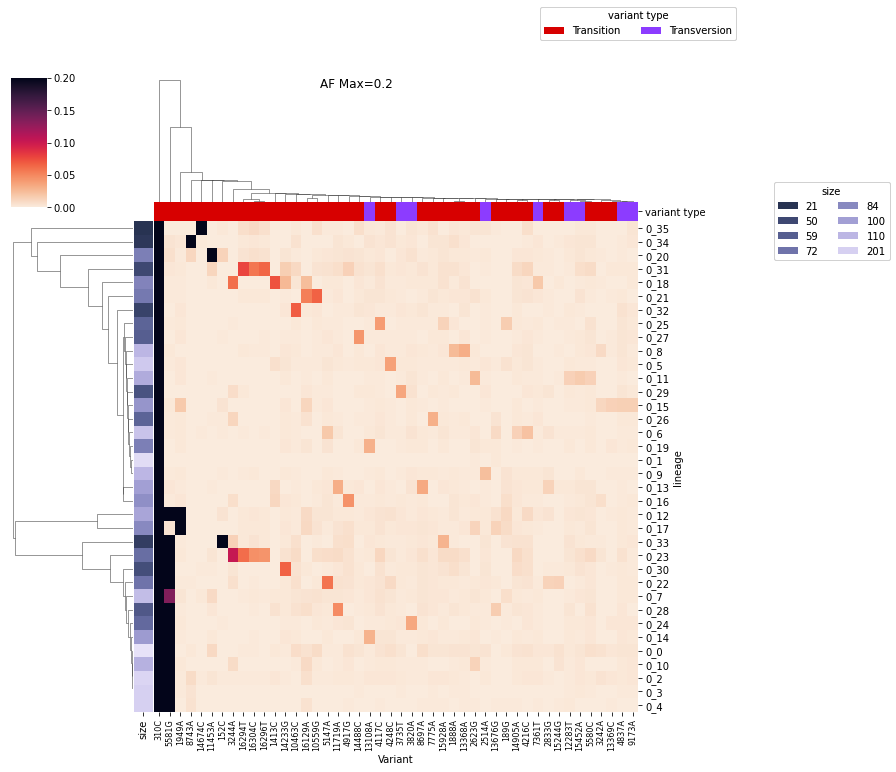

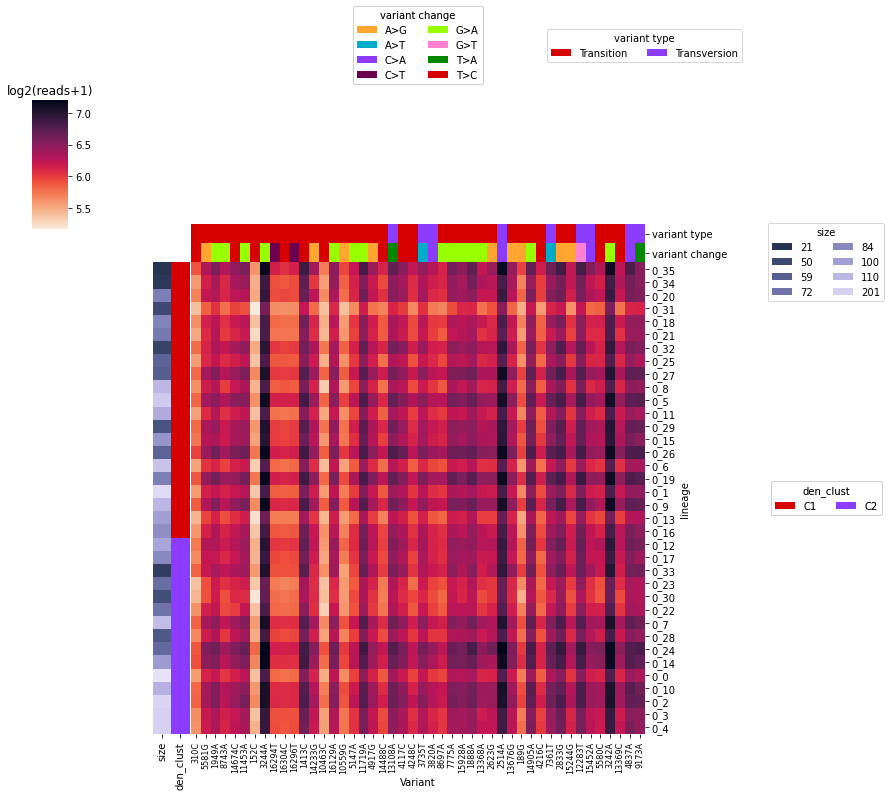

In [15]:
cluster_and_plot(mean_rmLow_af, mean_rmLow_dp, curr_clones, vmax=0.2, to_sqrt=False, name=out_f_rmLow)


distances
[0.30132 0.05953 0.27003 0.16678 0.24177 0.07199 0.26272 0.25472 0.33801
 0.33367 0.28539 0.02773 0.28038 0.27423 0.08254 0.18870 0.08549 0.28301
 0.26925 0.27244 0.09171 0.30421 0.05856 0.08764 0.33088 0.30813 0.20292
 0.35024 0.44813 0.05939 0.23291 0.26492 0.03169 0.23217 0.23417 0.27238
 0.12022 0.36376 0.18561 0.29437 0.14735 0.17395 0.27495 0.27854 0.11016
 0.27755 0.30483 0.22922 0.32032 0.40580 0.28627 0.16190 0.12115 0.13205
 0.30949 0.13493 0.26465 0.31640 0.32851 0.18531 0.39325 0.30350 0.29768
 0.26126 0.14918 0.12176 0.26451 0.16153 0.10903 0.26747 0.16207 0.30628
 0.07067 0.27895 0.28502 0.33748 0.34208 0.28090 0.04976 0.40522 0.29804
 0.09676 0.20907 0.07224 0.32282 0.26299 0.30151 0.09968 0.31511 0.04513
 0.09779 0.43491 0.35139 0.20786 0.41218 0.48650 0.03723 0.27310 0.29096
 0.05726 0.28925 0.28056 0.33768 0.19248 0.28525 0.17632 0.18339 0.23553
 0.29389 0.12335 0.28759 0.28698 0.21993 0.31638 0.38143 0.28464 0.20429
 0.18715 0.15332 0.30836 0.17684 0.30708 

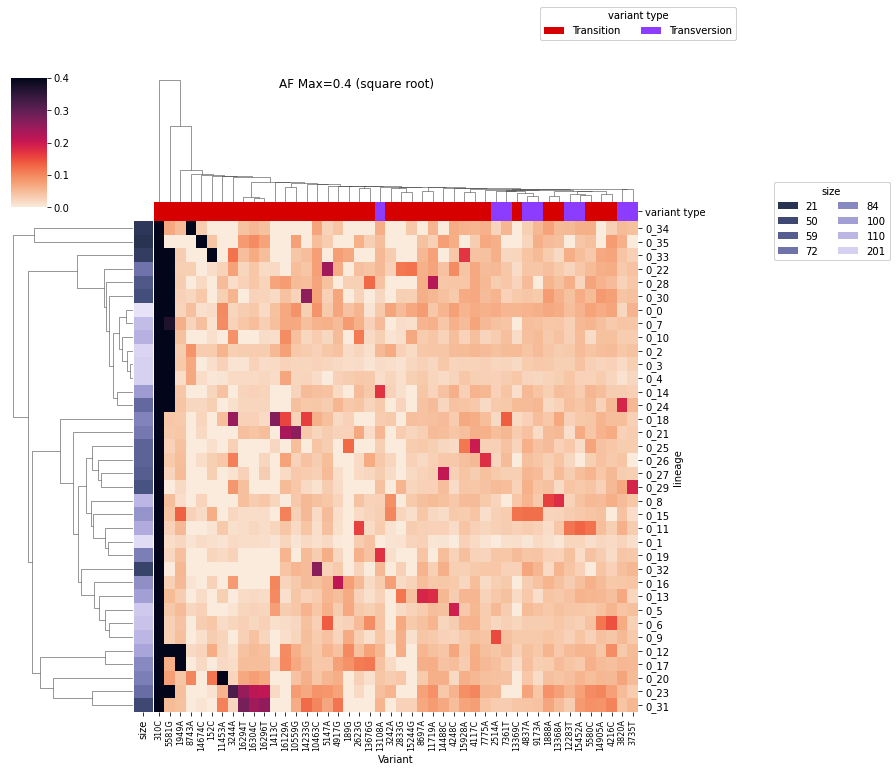

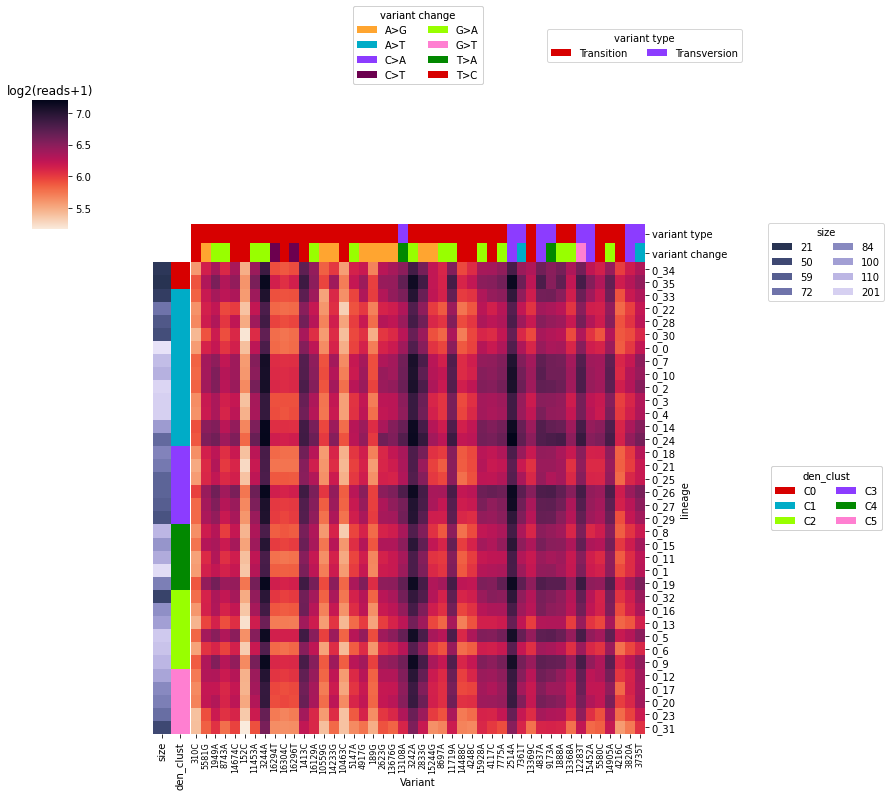

In [16]:
cluster_and_plot(mean_rmLow_af, mean_rmLow_dp, curr_clones, vmax=0.4, to_sqrt=True, name=out_f_rmLow)


distances
[0.31291 0.12724 0.27610 0.15917 0.23791 0.15587 0.27467 0.23755 0.23672
 0.31051 0.30318 0.05603 0.19619 0.23427 0.13877 0.23786 0.18594 0.30110
 0.28485 0.27323 0.17844 0.31422 0.11239 0.13772 0.27787 0.27835 0.23581
 0.27431 0.39179 0.11757 0.21319 0.26540 0.06566 0.22158 0.20801 0.25940
 0.22027 0.31291 0.31759 0.31957 0.26936 0.30948 0.26487 0.36224 0.23472
 0.27134 0.32092 0.31917 0.33074 0.41726 0.29453 0.31697 0.24120 0.26192
 0.32349 0.27536 0.24225 0.31794 0.39739 0.29704 0.37831 0.33191 0.33140
 0.23167 0.28655 0.21085 0.28477 0.29591 0.23256 0.25640 0.17638 0.34531
 0.17701 0.29358 0.27898 0.23567 0.30970 0.28807 0.12414 0.36255 0.25330
 0.17255 0.30192 0.17880 0.37447 0.26170 0.32656 0.20971 0.32837 0.11895
 0.16842 0.44013 0.34446 0.25684 0.36361 0.46611 0.09736 0.27871 0.30343
 0.12703 0.31994 0.29911 0.31112 0.32905 0.29718 0.31635 0.31488 0.23300
 0.40100 0.23446 0.30253 0.31563 0.30680 0.35122 0.39935 0.29731 0.37149
 0.34930 0.27860 0.34135 0.32995 0.32336 

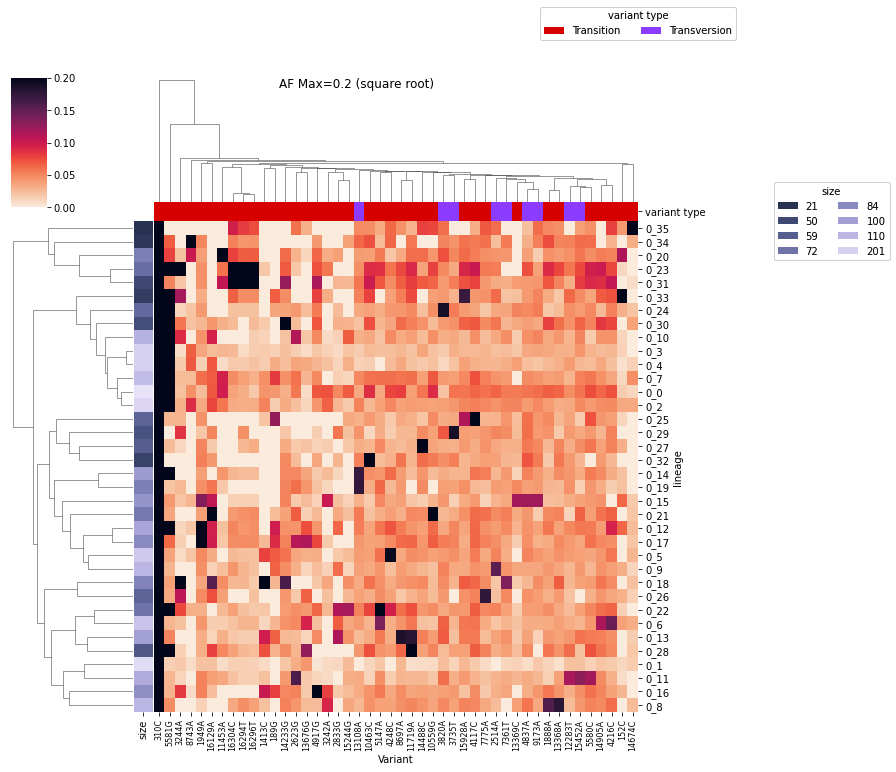

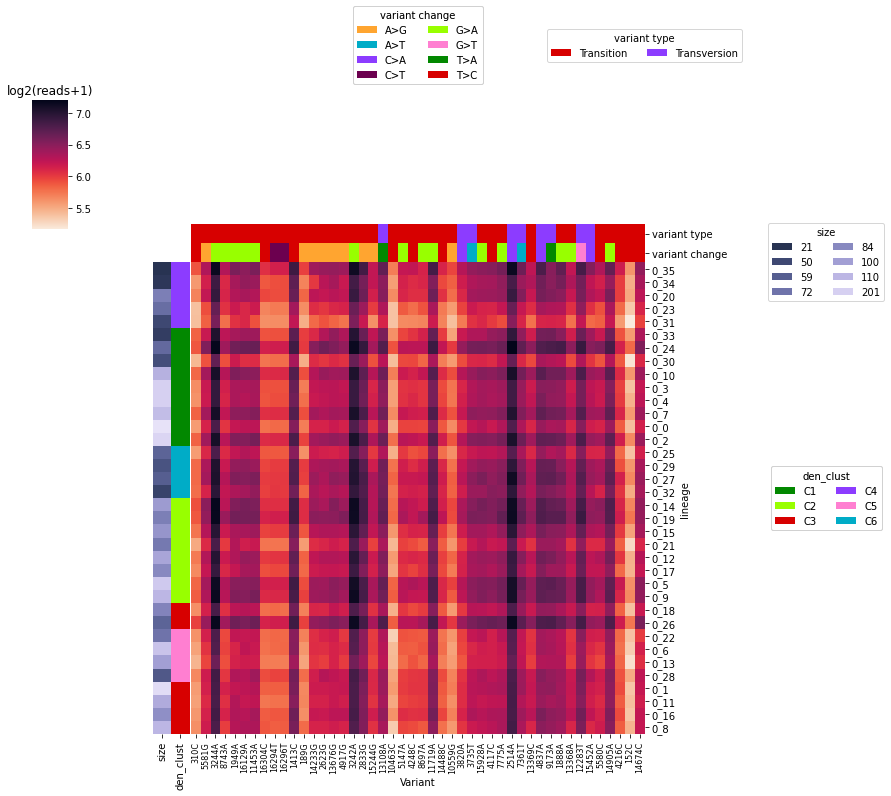

In [17]:
cluster_and_plot(mean_rmLow_af, mean_rmLow_dp, curr_clones, vmax=0.2, to_sqrt=True, name=out_f_rmLow)

In [21]:
out_f_rmLow

'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/barcodes/btwnClones_dendro_dt_dynamic_101022/donor0.rmLowVars'